In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from numpy.random import default_rng
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV 
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier 

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('dist.csv')
df

,1.9625391638241747;-0.2093015051962841;1
0,1.8196772907532126;-1.1706900335144368;1
1,2.63411103908187;0.03415550817587887;1
2,3.7650874901076996;-2.1042572035126277;1
3,5.952116686525816;0.8737006772678471;1
4,1.8256123827385642;0.19225493202780397;1
...,...
244,5.789276758752284;2.0530740122256033;0
245,5.742110046523934;1.0877583101615893;0
246,6.43138116112902;2.4526554055647853;0
247,6.660350050158288;1.7538515208581194;0


In [3]:
# Using regex so that each value that is seperated by a ;
# gets its own column.
df[['A', 'B', 'C']] = df['1.9625391638241747;-0.2093015051962841;1'].str.split(';', expand=True)
df = df.drop('1.9625391638241747;-0.2093015051962841;1', axis=1)
df.loc[len(df)] = ['1.9625391638241747', '-0.2093015051962841', '1']
df = df.astype('float')
df

,A,B,C
0,1.819677,-1.170690,1.0
1,2.634111,0.034156,1.0
2,3.765087,-2.104257,1.0
3,5.952117,0.873701,1.0
4,1.825612,0.192255,1.0
...,...,...,...
245,5.742110,1.087758,0.0
246,6.431381,2.452655,0.0
247,6.660350,1.753852,0.0
248,7.238425,2.276358,0.0


In [4]:
X = df[['A', 'B']]
y = df['C']

In [5]:
# Validation
df = pd.read_csv('dist_val.csv')
df

,5.145115070525757;3.1600109850128635;0
0,4.8978084946410725;1.8108926170469035;0
1,6.840803291758959;2.57461240235098;0
2,6.6539113346869;0.592462338691915;0
3,4.962545245318675;0.7325971689130012;0
4,5.864476120937141;0.8128459057718282;0
...,...
19994,0.7905706374179646;-1.7327502048569263;1
19995,2.018009791553452;-2.992298693482254;1
19996,0.8825793070491088;0.8121116444757925;1
19997,0.8795492190028895;-3.545631460193093;1


In [6]:
df[['A', 'B', 'C']] = df['5.145115070525757;3.1600109850128635;0'].str.split(';', expand=True)
df = df.drop('5.145115070525757;3.1600109850128635;0', axis=1)
new_record = pd.DataFrame([[5.145115070525757, 3.1600109850128635, 0]], columns=df.columns)
df = pd.concat([new_record, df], ignore_index=True)
df = df.astype('float')

In [7]:
X_val = df[['A', 'B']]
y_val = df['C']
type(y_val)

pandas.core.series.Series

In [8]:
# Hyperparameters for linear kernel
param_grid = {'C': [0.1, 0.01, 0.001, 0.0001],  
              'kernel': ['linear']}  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1) 
grid  
grid.fit(X_val, y_val)
print(grid.best_params_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'C': 0.1, 'kernel': 'linear'}


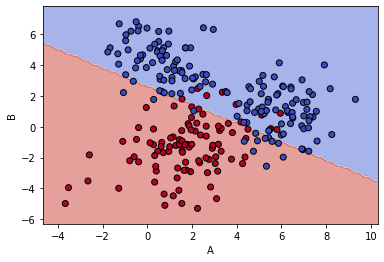

In [9]:
# Plotting linear kernel
disp = DecisionBoundaryDisplay.from_estimator(grid, 
                                              X, 
                                              response_method="predict",
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)
disp.ax_.scatter(X['A'], X['B'], 
                 c=y, edgecolor="k",
                 cmap=plt.cm.coolwarm)
plt.show()

In [10]:
# For rbf kernel
param_grid = {'C': [0.1, 0.01, 0.001],  
              'gamma': [1, 10, 100], 
              'kernel': ['rbf']}  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1) 
grid  
grid.fit(X_val, y_val)
print(grid.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


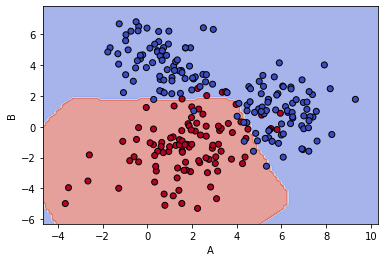

In [11]:
disp = DecisionBoundaryDisplay.from_estimator(grid, 
                                              X, 
                                              response_method="predict",
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)
disp.ax_.scatter(X['A'], X['B'], 
                 c=y, edgecolor="k",
                 cmap=plt.cm.coolwarm)
plt.show()

In [ ]:
# For poly kernel
param_grid = {'C': [0.1, 0.01],  
              'gamma': [1, 10], 
              'degree': [2, 3],
              'kernel': ['poly']}  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1) 
grid  
grid.fit(X_val, y_val)
print(grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [ ]:
disp = DecisionBoundaryDisplay.from_estimator(grid, 
                                              X, 
                                              response_method="predict",
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)
disp.ax_.scatter(X['A'], X['B'], 
                 c=y, edgecolor="k",
                 cmap=plt.cm.coolwarm)
plt.show()